In [ ]:
# Import pandas and numpy libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Load dataset
df = pd.read_csv("Ames_train.csv")  # Ensure this file is in the same folder as the notebook

🔍 Analysis of 'Overall Qual'
▸ Type: Ordinal Categorical (integer rating 1–10)

count    2344.000000
mean        6.095990
std         1.412009
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

▸ Category Distribution (%):
Overall Qual
1      0.127986
2      0.469283
3      1.279863
4      7.636519
5     28.668942
6     24.530717
7     20.349829
8     12.414676
9      3.370307
10     1.151877
Name: proportion, dtype: float64

▸ Skewness: 0.20


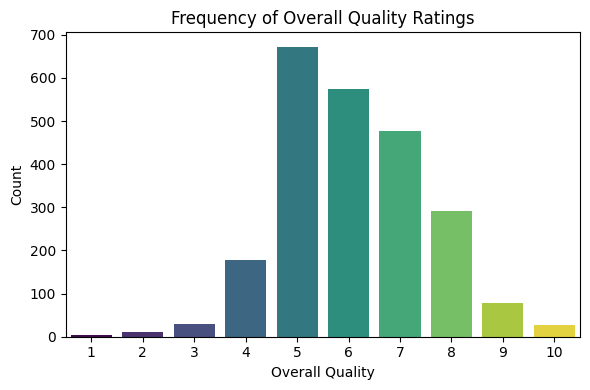

In [ ]:
# 🔍 Univariate Analysis: Overall Qual
col = 'Overall Qual'
data = df[col].dropna()

print(f"🔍 Analysis of '{col}'")
print("▸ Type: Ordinal Categorical (integer rating 1–10)\n")
print(data.describe())
# mean is around 6 which indicates that average overall quality of the house is above average in the data set.
#this is a categorical ordinal variable with 10 categories.

# Category distribution
print("\n▸ Category Distribution (%):")
print(data.value_counts(normalize=True).sort_index() * 100)

#The data is fairly concentrated around overall quality of 5-7, meaning around 73% of properties are rated from average to good in quality.

# Skewness
print(f"\n▸ Skewness: {data.skew():.2f}")

# Bar plot (future-proof with hue)
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False)
plt.title('Frequency of Overall Quality Ratings')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


🔍 Analysis of 'Gr Liv Area'
▸ Type: Continuous Numeric

count    2344.000000
mean     1498.672782
std       501.594613
min       334.000000
25%      1126.000000
50%      1449.000000
75%      1743.000000
max      5642.000000
Name: Gr Liv Area, dtype: float64

▸ Key Percentiles:
0.01     693.43
0.25    1126.00
0.50    1449.00
0.75    1743.00
0.99    2924.22
Name: Gr Liv Area, dtype: float64

▸ Skewness: 1.27 (Right-skewed if > 1)


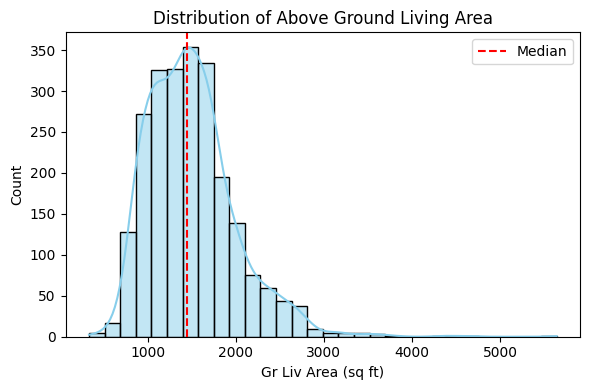

In [ ]:
# 🔍 Univariate Analysis: Gr Liv Area
col = 'Gr Liv Area'
data = df[col].dropna()

print(f"🔍 Analysis of '{col}'")
print("▸ Type: Continuous Numeric\n")
print(data.describe())
#Ground living area is a numerical continuous variable.
#the mean indicate that on average the data set obtained of 2,344 data points has ground living area of almost 1,500 square feet.

# Percentiles
print("\n▸ Key Percentiles:")
print(data.quantile([0.01, 0.25, 0.5, 0.75, 0.99]))

#Around 50% of the home have a ground living area of about 1,449 square feet and below, slightly lower than median of 1,498. This might be due to some
#outliers as seen with P99 (2,924) which indicates that a few of the houses are significantly larger than the rest.

# Skewness
print(f"\n▸ Skewness: {data.skew():.2f} (Right-skewed if > 1)")

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data, kde=True, bins=30, color='skyblue')
plt.axvline(data.median(), color='red', linestyle='--', label='Median')
plt.title('Distribution of Above Ground Living Area')
plt.xlabel('Gr Liv Area (sq ft)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


Correlation (Overall Qual vs SalePrice): 0.80


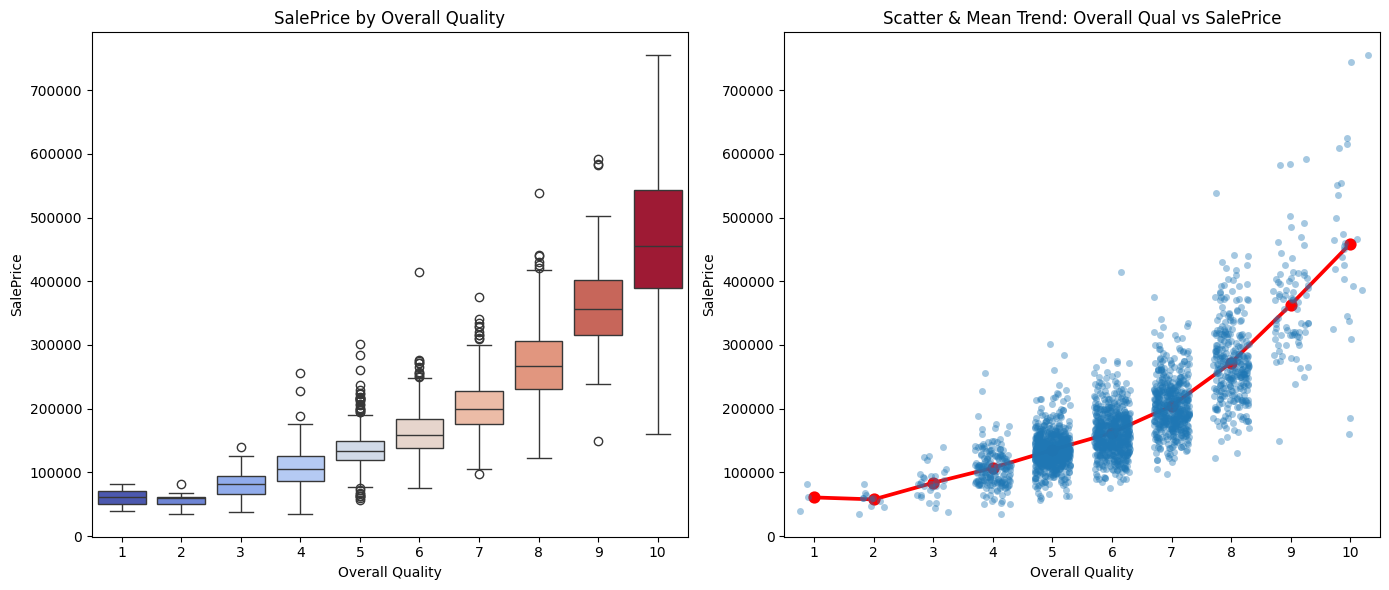

In [ ]:
# 🔁 Bivariate Analysis: Overall Qual vs SalePrice
df_clean_qual = df[['Overall Qual', 'SalePrice']].dropna()

corr = df_clean_qual.corr().iloc[0, 1]
print(f"Correlation (Overall Qual vs SalePrice): {corr:.2f}")

plt.figure(figsize=(14, 6))
#We ran a correlation between overall quality of the house and the saleprice, which shows a strong positive correlation r=0.8. This indicates a very
#strong linear relationship, meaning home with better quality consistently sell for more than lower quality houses.

# Boxplot (future-proof with hue)
plt.subplot(1, 2, 1)
sns.boxplot(x='Overall Qual', y='SalePrice', data=df, hue='Overall Qual', palette='coolwarm', legend=False)
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
#The Boxplot we ran shows us an increasing spread in the Sale Price for higher quality ratings (especially 8–10)
#This indicates that better quality homes vary more in price likely that could be due to size, location of the house, or custom features.
#Lower quality homes (1–4) show low variability in price. Further the boxplot shows us noticable outliers especially in quality of 5-8. These outliers
#might affect the machine learning models we will be creating.

# Scatterplot + Mean Trendline
plt.subplot(1, 2, 2)
sns.stripplot(x='Overall Qual', y='SalePrice', data=df, jitter=0.3, alpha=0.4)
sns.pointplot(x='Overall Qual', y='SalePrice', data=df, color='red', estimator=np.mean, errorbar=None)
plt.title('Scatter & Mean Trend: Overall Qual vs SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

#We have created a scatterplot with a mean trendline to better understand the relationship between price and quality. It seems that when Overall Qual
#increases, Price doesn't just increase linearly it grows more steeply.Especially from house quality 7 onwards, price rises significantly faster.


Correlation (Garage Cars vs SalePrice): 0.65


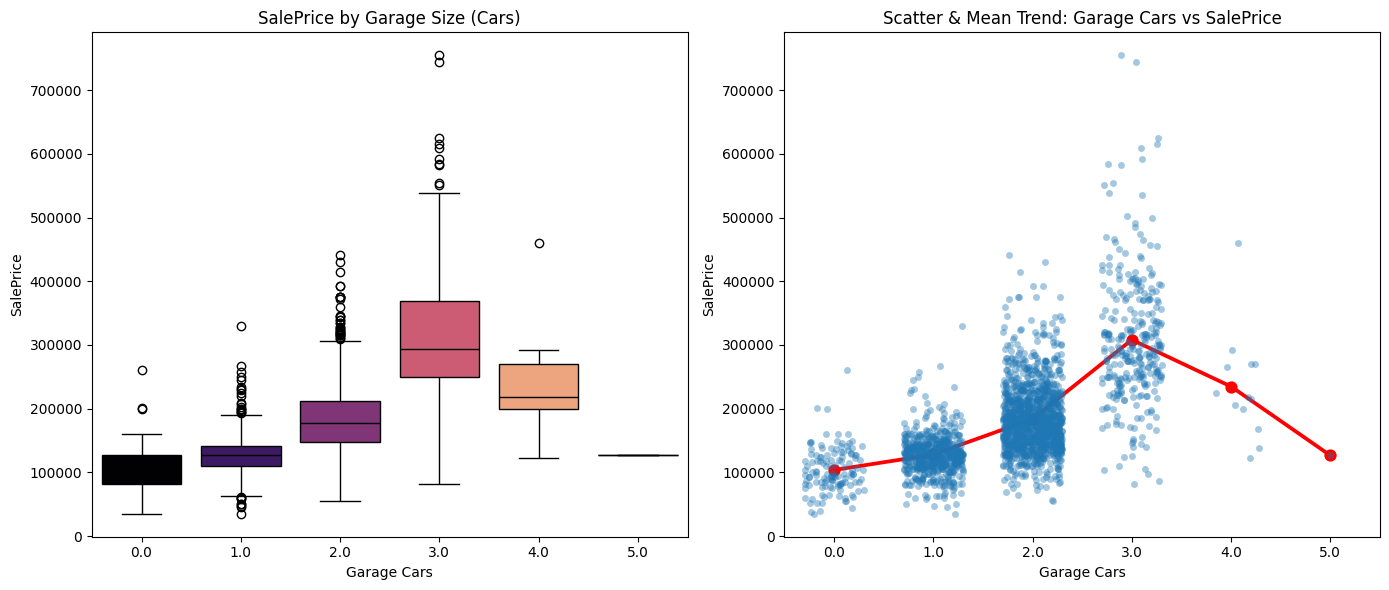

In [ ]:
# 🔁 Bivariate Analysis: Garage Cars vs SalePrice
df_clean_garage = df[['Garage Cars', 'SalePrice']].dropna()

corr = df_clean_garage.corr().iloc[0, 1]
print(f"Correlation (Garage Cars vs SalePrice): {corr:.2f}")

plt.figure(figsize=(14, 6))

#We ran a correlation between garage car (which shows the size of the garage in car capaicty). It seems there is a positive correlation between the
#the size of the garage and price with r=0.65.

# Boxplot (future-proof with hue)
plt.subplot(1, 2, 1)
sns.boxplot(x='Garage Cars', y='SalePrice', data=df_clean_garage, hue='Garage Cars', palette='magma', legend=False)
plt.title('SalePrice by Garage Size (Cars)')
plt.xlabel('Garage Cars')
plt.ylabel('SalePrice')
#Garage 0–2 cars show many outliers above the whiskers in the boxplot with some homes selling for 300K–600K+ this might be due to other factors
#that would be increasing the price of the house (e.g., location, overall quality, size of house).

# Scatterplot + Mean Trendline
plt.subplot(1, 2, 2)
sns.stripplot(x='Garage Cars', y='SalePrice', data=df_clean_garage, jitter=0.3, alpha=0.4)
sns.pointplot(x='Garage Cars', y='SalePrice', data=df_clean_garage, color='red', estimator=np.mean, errorbar=None)
plt.title('Scatter & Mean Trend: Garage Cars vs SalePrice')
plt.xlabel('Garage Cars')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

#Both graphs show that Price tends to rise as garage size increases from 0 to 3 cars. Homes with 3 car garages have the highest median Price
#and the widest price spread (indicating price might flucuates due to other variables). After 3-car garages, the trend drops for 4-car and
#5-car garage homes. These drops may be due to the sample size (for garage size 5 there seems to be only 1 data point)
#Analyzing both variable tells that a non-linear relationship exist between these variables as adding more garages doesn't always increase the price of the house.

In [ ]:
# Read train data from csv file

train_df = pd.read_csv('Ames_train.csv')
train_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
1,923225240,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
2,534178010,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,COD,Normal,127000
3,905452160,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,128000
4,535376100,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480


In [ ]:
# Removing variables with over 200 missing values

# prompt: write a script to remove variables with over 200 missing values in Ames_train. Additionally, print the list of variables which are being removed from the Ames_train dataset
#We have decided to remove these columns as we saw significant amount of missing data that might impact our machine learning model.

# Count the number of missing values in each column
missing_values = train_df.isnull().sum()

# Identify columns with more than 200 missing values
columns_to_remove = missing_values[missing_values > 200].index.tolist()

# Print the list of variables being removed
print("Variables being removed:", columns_to_remove)

# Remove the identified columns from the DataFrame
train_df = train_df.drop(columns=columns_to_remove)


Variables being removed: ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']


In [ ]:
# 7 new feature engineering varibles trying to reduce redudency from the

## 1. Overall_FullBath = BsmtFullBath + FullBath — shows the total number of full bathrooms in the house
## 2. Overall_HalfBath = BsmtHalfBath + HalfBath — shows total number of half bathroom in the house
## 3. Total_SqFt = 1stFlrSF + 2ndFlrSF + Total Bsmt SF + Gr Liv Area — shows the total square footage of the house
## 4. House_Qual = OverallQual * OverallCond — capture both variable in one metric, this variable captures an interaction effect between quality and condition that might be more than looking at each variable alone.
## 5. Lot_Live_Raio = LotArea / GrLivArea — shows how much lot area there is per unit of living space
## 6. Garage_area_ratio = GarageArea / GrLivArea — Ratio of garage space to living area.
## 7. Total_area = GarageArea + GrLivArea — Sum of garage and living area, representing total area in the ground floor including garage
## Adding the above variables in the train_df dataset

# Feature Engineering
train_df['Overall_FullBath'] = train_df['Bsmt Full Bath'] + train_df['Full Bath']
train_df['Overall_HalfBath'] = train_df['Bsmt Half Bath'] + train_df['Half Bath']
train_df['Total_SqFt'] = train_df['1st Flr SF'] + train_df['2nd Flr SF'] + train_df['Total Bsmt SF'] + train_df['Gr Liv Area']
train_df['House_Qual'] = train_df['Overall Qual'] * train_df['Overall Cond']
train_df['Lot_Live_Ratio'] = train_df['Lot Area'] / train_df['Gr Liv Area']
train_df['Garage_area_ratio'] = train_df['Garage Area']/train_df['Gr Liv Area']
train_df['Total_area'] = train_df['Garage Area'] + train_df['Gr Liv Area']

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PID                2344 non-null   int64  
 1   MS SubClass        2344 non-null   int64  
 2   MS Zoning          2344 non-null   object 
 3   Lot Area           2344 non-null   int64  
 4   Street             2344 non-null   object 
 5   Lot Shape          2344 non-null   object 
 6   Land Contour       2344 non-null   object 
 7   Utilities          2344 non-null   object 
 8   Lot Config         2344 non-null   object 
 9   Land Slope         2344 non-null   object 
 10  Neighborhood       2344 non-null   object 
 11  Condition 1        2344 non-null   object 
 12  Condition 2        2344 non-null   object 
 13  Bldg Type          2344 non-null   object 
 14  House Style        2344 non-null   object 
 15  Overall Qual       2344 non-null   int64  
 16  Overall Cond       2344 

In [ ]:
# prompt: write a code for value counts of the object datatype

import pandas as pd

# Assuming 'train_df' is already defined as in your provided code

# Loop through each column and print value counts for object types
for col in train_df.columns:
  if train_df[col].dtype == 'object':
    print(f"Value counts for column '{col}':")
    print(train_df[col].value_counts())
    print("-" * 20)


Value counts for column 'MS Zoning':
MS Zoning
RL         1828
RM          362
FV          110
RH           21
C (all)      20
I (all)       2
A (agr)       1
Name: count, dtype: int64
--------------------
Value counts for column 'Street':
Street
Pave    2333
Grvl      11
Name: count, dtype: int64
--------------------
Value counts for column 'Lot Shape':
Lot Shape
Reg    1484
IR1     791
IR2      56
IR3      13
Name: count, dtype: int64
--------------------
Value counts for column 'Land Contour':
Land Contour
Lvl    2103
Bnk      97
HLS      95
Low      49
Name: count, dtype: int64
--------------------
Value counts for column 'Utilities':
Utilities
AllPub    2341
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
--------------------
Value counts for column 'Lot Config':
Lot Config
Inside     1711
Corner      400
CulDSac     148
FR2          72
FR3          13
Name: count, dtype: int64
--------------------
Value counts for column 'Land Slope':
Land Slope
Gtl    2234
Mod      97
Se

In [ ]:
# prompt: create a list of columns where dtype = object along with their different value counts

import pandas as pd
import numpy as np

# Assuming 'train_df' is already defined as in your provided code
# and the code to create it is present in the notebook's cells above.

# Create an empty list to store column names and their value counts
object_columns_value_counts = []


# Loop through each column and print value counts for object types
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        object_columns_value_counts.append((col, train_df[col].value_counts()))

# Print the list of object columns and their value counts
for col_name, value_counts in object_columns_value_counts:
    print(f"Value counts for column '{col_name}':")
    print(value_counts)
    print("-" * 20)


Value counts for column 'MS Zoning':
MS Zoning
RL         1828
RM          362
FV          110
RH           21
C (all)      20
I (all)       2
A (agr)       1
Name: count, dtype: int64
--------------------
Value counts for column 'Street':
Street
Pave    2333
Grvl      11
Name: count, dtype: int64
--------------------
Value counts for column 'Lot Shape':
Lot Shape
Reg    1484
IR1     791
IR2      56
IR3      13
Name: count, dtype: int64
--------------------
Value counts for column 'Land Contour':
Land Contour
Lvl    2103
Bnk      97
HLS      95
Low      49
Name: count, dtype: int64
--------------------
Value counts for column 'Utilities':
Utilities
AllPub    2341
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
--------------------
Value counts for column 'Lot Config':
Lot Config
Inside     1711
Corner      400
CulDSac     148
FR2          72
FR3          13
Name: count, dtype: int64
--------------------
Value counts for column 'Land Slope':
Land Slope
Gtl    2234
Mod      97
Se

In [ ]:
# prompt: in col_name filter columns where the value count for one value is above 90%

# Assuming 'train_df' is already defined as in your provided code.

def filter_columns_by_value_counts(df, col_name, threshold=0.9):
    """
    Filters columns based on the value counts of a specified column.

    Args:
        df: The pandas DataFrame.
        col_name: The name of the column to check for value counts.
        threshold: The threshold for the value counts (default is 0.9).

    Returns:
        A list of column names that meet the criteria.
    """
    filtered_cols = []
    if df[col_name].dtype == 'object':
      value_counts = df[col_name].value_counts(normalize=True)
      if value_counts.iloc[0] > threshold:
        filtered_cols.append(col_name)

    return filtered_cols

# Example usage
threshold_value = 0.95
filtered_columns = []
for col in train_df.columns:
  filtered_columns.extend(filter_columns_by_value_counts(train_df, col, threshold_value))

print(f"Columns where a single value accounts for more than {threshold_value*100}% of the counts:")
filtered_columns


Columns where a single value accounts for more than 95.0% of the counts:


['Street',
 'Utilities',
 'Land Slope',
 'Condition 2',
 'Roof Matl',
 'Heating',
 'Garage Cond']

In [ ]:
# Removing variables used in the above seven feature engineering and with similarity above 95%

# prompt: write a script to remove the following variables:
# 1. Bsmt Full Bath
# 2. Full Bath
# 3. Bsmt Half Bath
# 4. Half Bath
# 5. 1st Flr SF
# 6. 2nd Flr SF
# 7. Total Bsmt SF
# 8. Gr Liv Area
# 9. Overall Qual
# 10. Overall Cond
# 11. Lot Area
# 12. Garage Area

# Remove specified variables
variables_to_remove = ['Garage Qual', 'Garage Cond', 'Bsmt Full Bath', 'Full Bath',
                       'Bsmt Half Bath', 'Half Bath', '1st Flr SF', '2nd Flr SF',
                       'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Lot Area', 'Garage Area']
train_df = train_df.drop(columns=variables_to_remove)



In [ ]:
# prompt: write a script to filter and create a table with all the object datatype

import pandas as pd

# Assuming your DataFrame is named 'train_df'
# and it has already been processed as in the provided code.

# Filter for object data types
object_columns = train_df.select_dtypes(include=['object'])

# Create a new DataFrame with only object columns
object_df = pd.DataFrame(object_columns)

# Print or further process the object_df
object_df


,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,...,Ex,Y,SBrkr,TA,Typ,Attchd,Fin,Y,WD,Normal
1,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Y,SBrkr,TA,Typ,Attchd,Fin,Y,COD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Y,SBrkr,TA,Typ,Attchd,Fin,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Corner,Sev,OldTown,Norm,Norm,...,Ex,Y,SBrkr,TA,Typ,Detchd,Unf,Y,WD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,...,Gd,Y,SBrkr,TA,Typ,Attchd,Unf,Y,WD,Normal
2340,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRAn,Norm,...,Ex,Y,SBrkr,TA,Typ,BuiltIn,Fin,Y,WD,Normal
2341,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,TA,Y,SBrkr,TA,Typ,Attchd,RFn,Y,WD,Normal
2342,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Y,WD,Normal


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PID                2344 non-null   int64  
 1   MS SubClass        2344 non-null   int64  
 2   MS Zoning          2344 non-null   object 
 3   Street             2344 non-null   object 
 4   Lot Shape          2344 non-null   object 
 5   Land Contour       2344 non-null   object 
 6   Utilities          2344 non-null   object 
 7   Lot Config         2344 non-null   object 
 8   Land Slope         2344 non-null   object 
 9   Neighborhood       2344 non-null   object 
 10  Condition 1        2344 non-null   object 
 11  Condition 2        2344 non-null   object 
 12  Bldg Type          2344 non-null   object 
 13  House Style        2344 non-null   object 
 14  Year Built         2344 non-null   int64  
 15  Year Remod/Add     2344 non-null   int64  
 16  Roof Style         2344 

In [ ]:
# prompt: write a script to do One hot encoding to all the objective data types in train_df

# Assuming 'train_df' is already defined and processed as in your provided code.

# One-hot encode object columns
train_df = pd.get_dummies(train_df, drop_first=True)


In [ ]:
# prompt: write a code to export the csv file

# Assuming 'train_df' is already defined and processed as in your provided code.

# One-hot encode object columns
train_df = pd.get_dummies(train_df, drop_first=True)

# Export the DataFrame to a CSV file
train_df.to_csv('processed_ames_train.csv', index=False)

# Download and save the file
print("File saved as 'processed_ames_train.csv'")


File saved as 'processed_ames_train.csv'


In [ ]:
print(object_columns)

     MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0           RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1           RM   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2           RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3           RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4           RL   Pave       Reg          Lvl    AllPub     Corner        Sev   
...        ...    ...       ...          ...       ...        ...        ...   
2339        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2340        RL   Pave       IR1          Lvl    AllPub        FR2        Gtl   
2341        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2342        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
2343        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   

     Neighborhood Condition 1 Condition

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# We define our One Hot Encoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

# We can use here a list of one or more categorical variables to convert into numerical
#categorical_features = ['Central Air', 'Electrical', 'Kitchen Qual', 'Functional','Garage Type', 'Garage Finish', 'Paved Drive',etc]
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'object']
print(categorical_features)

# We apply the encoding to our train dataset
feature_arr = ohe.fit_transform(train_df[categorical_features]).toarray()

# We also store the names of the categories for the new column names
feature_labels = ohe.categories_

# We apply the new feature names
features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())

# And then combine with the rest of the numerical variables
train_df = pd.concat([train_df, features], axis=1).drop(columns=categorical_features,
                                                        axis=1)

train_df.head()

print("✅ OHE completed.")
print(f"Total columns after encoding: {len(train_df.columns)}")
print("Sample columns:", train_df.columns[:10].tolist())
print(train_df.head(2))

[]
✅ OHE completed.
Total columns after encoding: 230
Sample columns: ['PID', 'MS SubClass', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Low Qual Fin SF']
         PID  MS SubClass  Year Built  Year Remod/Add  Mas Vnr Area  \
0  527402250           20        1971            2008           0.0   
1  923225240          160        1977            1977           0.0   

   BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Low Qual Fin SF  \
0         734.0           0.0        344.0         1078.0                0   
1         548.0         173.0         36.0          757.0                0   

   ...  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0  ...            False          False          False          False   
1  ...            False          False          False          False   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0           True                   False   

In [ ]:
# Now, we kept all variables that we selected above plus all the OHE variables that we have created
# We will use the standard naming of:
# - X for the dataframe including all the input variables
# - y for the target 1-column dataframe

X = train_df.drop(columns=['SalePrice']).fillna(0)

y = train_df[['SalePrice']]

# We print the shape to get a better idea of the number
# of rows and columns that we got

X.shape, y.shape

((2344, 229), (2344, 1))

In [ ]:
from sklearn.model_selection import train_test_split

# We have created a random split for our validation data set in order to test our
# in this case, we'll use a 35% split.

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.35,
                                                  random_state=2023)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1523, 229), (821, 229), (1523, 1), (821, 1))

In [ ]:
# For our second model we have decided to do a random forest. We are trying to iterate through different number of estimators, features, and max_depth.
# train the model and test it using RMSE in both train and validations sets:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

result_train_dict = {}
result_val_dict = {}

max_max_depth = 14
max_n_estimators = 71

for m in range(1, max_max_depth, 2): # max depth of trees

    print(m) # indicating how the training is progressing

    for n in range(1, max_n_estimators, 2): # number of trees
        for s in [0.6, 0.7, 0.8, 0.9]:      # % of samples
            for k in [0.6, 0.7, 0.8, 0.9]:  # % of features

                tree_reg = RandomForestRegressor(random_state= 42,
                                                 n_estimators= n,
                                                 max_depth= m,
                                                 max_features= k,
                                                 bootstrap= True,
                                                 max_samples= s)

                tree_reg.fit(X_train, np.ravel(y_train))

                train_predicted = tree_reg.predict(X_train)
                val_predicted = tree_reg.predict(X_val)

                result_train_dict[m, n, s, k] = np.sqrt(mean_squared_error(np.log(y_train),
                                                                           np.log(train_predicted)))
                result_val_dict[m, n, s, k] = np.sqrt(mean_squared_error(np.log(y_val),
                                                                         np.log(val_predicted)))

# our model is trying to
results_df = pd.DataFrame.from_dict(result_val_dict,
                       orient='index',
                       columns=['val_rmse']
                      ).sort_values(by='val_rmse',
                                    ascending=True)

print(results_df)


1
3
5
7
9
11
13
                    val_rmse
(13, 47, 0.7, 0.9)  0.126052
(13, 49, 0.7, 0.9)  0.126154
(13, 51, 0.7, 0.9)  0.126201
(13, 65, 0.7, 0.9)  0.126219
(13, 61, 0.7, 0.9)  0.126312
...                      ...
(1, 1, 0.7, 0.7)    0.327654
(1, 1, 0.9, 0.7)    0.329209
(1, 1, 0.9, 0.6)    0.329209
(1, 1, 0.8, 0.7)    0.329436
(1, 1, 0.8, 0.6)    0.329436

[3920 rows x 1 columns]


In [ ]:
#Lowest RMSE in validation set is (13, 47, 0.7, 0.9), we have choosen these variable for our train model.

pd.DataFrame.from_dict(result_train_dict, orient='index',
                       columns=['train_rmse']).loc[[(13, 47, 0.7, 0.9)]]


#Train rmse is 0.074579, the difference between training and validation RMSE indicate that the model might be over-fitting however these are the best
#parameters that we have obtained based on the RSME-val and we have chosen them for our model and will be used with our test data set.

,train_rmse
"(13, 47, 0.7, 0.9)",0.074579


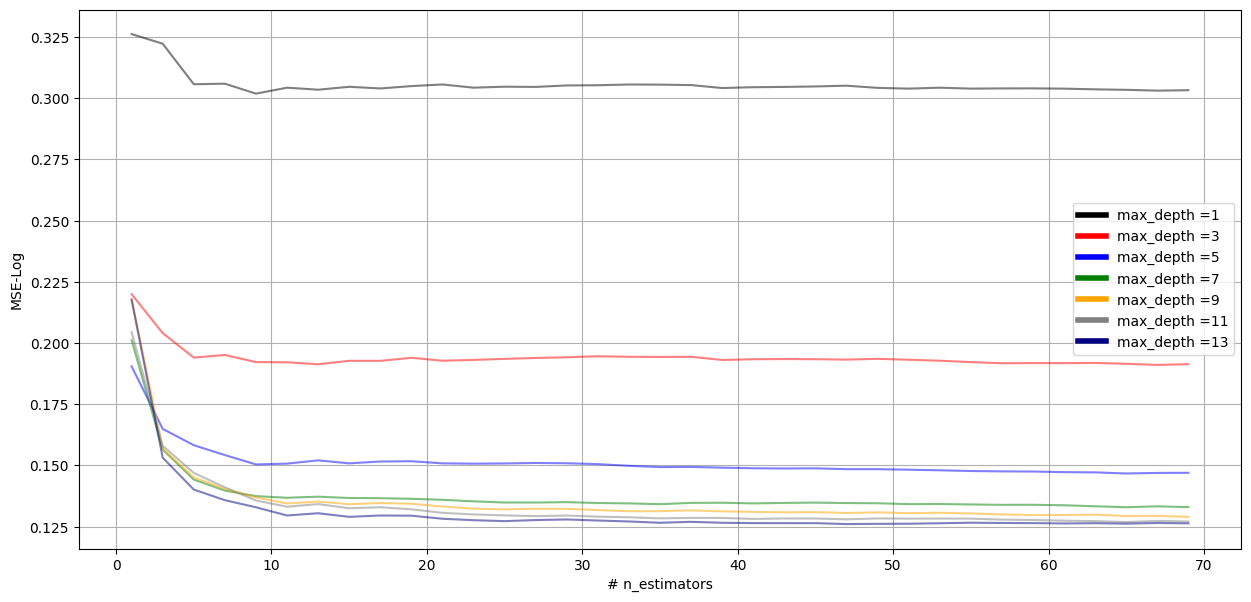

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(15, 7))
colors= ['black', 'red', 'blue', 'green', 'orange', 'gray','navy']
color_index = 0
custom_lines = np.array([])
custom_names = np.array([])

s=0.7
k=0.9

#S and K selected based on the max feature and max sample that we have obtained above.

for m in range(1, max_max_depth, 2):

    line_plot_train = []
    line_plot_val = []

    for n in range(1, max_n_estimators, 2):
        line_plot_train.append(result_train_dict.get((m,n,s,k)))
        line_plot_val.append(result_val_dict.get((m,n,s,k)))

   # Plotting train error evolution
    #plt.plot(np.arange(start=1, stop=max_n_estimators, step=2),
             #line_plot_train, alpha=0.5, c=colors[color_index], linestyle='--')

    # Plotting validation error evolution
    plt.plot(np.arange(start=1, stop=max_n_estimators, step=2),
             line_plot_val, alpha=0.5, c=colors[color_index])

    color_line = Line2D([0], [0], color=colors[color_index], lw=4)
    custom_lines = np.append(custom_lines,color_line)
    color_name = 'max_depth =' + str(m)
    custom_names = np.append(custom_names,color_name)
    color_index+=1

#ax.set_xlim(max_min_samples_leaf, 0)
#plt.xticks(np.arange(start=1, stop=max_min_samples_leaf, step=2), rotation=90, size=10)

ax.grid(True)
plt.xlabel('# n_estimators')
plt.ylabel('MSE-Log')

ax.legend(custom_lines, custom_names)

plt.show()


In [ ]:
#Based on the plot above we can tell that max depth of 13 and 47 trees are the best parameters for the random forest.
#the blue line (max depth=13) has the lowest validation error and it's lowest point is at approx. 47 estimators.
#This in line with the optimal parameters found above with val_rmse = 0.12605
#Final Model: We have chosen the below parameter:
#n_estimators=47, max_depth=13, and 90% for our max features and and 70% for our max samples

tree_reg = RandomForestRegressor(random_state=42,
                                 n_estimators= 47,
                                 max_depth= 13,
                                 max_features= 0.9,
                                 max_samples= 0.7,
                                 bootstrap= True)

tree_reg.fit(X_train, np.ravel(y_train))

train_predicted = tree_reg.predict(X_train)
val_predicted = tree_reg.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(np.log(y_train), np.log(train_predicted)))
val_rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(val_predicted)))

print(f"Train RMSE: {train_rmse:.5f}")
print(f"Validation RMSE: {val_rmse:.5f}")

#The validation RMSE is 0.12605, which is higher than the train RMSE (0.07458). Which might indicate that the model might be overfitting.

Train RMSE: 0.07458
Validation RMSE: 0.12605


In [ ]:
# Applying the parameters chosen above to the whole train dataset getting a similar RMSE that we got for training. RSME for all training data is 0.07229
#which i very similar to the train RSME above of 0.07458.

X = train_df.drop(columns=['SalePrice'])
y = train_df[['SalePrice']]

tree_reg = RandomForestRegressor(random_state=42,
                                 n_estimators= 47,
                                 max_depth= 13,
                                 max_features= 0.9,
                                 max_samples= 0.7,
                                 bootstrap= True)

tree_reg.fit(X, np.ravel(y))

train_predicted = tree_reg.predict(X)

final_rmse = np.sqrt(mean_squared_error(np.log(y), np.log(train_predicted)))

print(f"Complete train RMSE (trained on all data): {final_rmse:.5f}")

Complete train RMSE (trained on all data): 0.07229


In [ ]:
# Read the test csv file, and repeat the process:

test_df = pd.read_csv('Ames_test.csv')
test_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
2,527358200,85,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,WD,Family,170000
3,527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
4,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000


In [ ]:
# 7 new feature engineering varibles that were introduced in our train model have been replicated for our test data.
# Feature Engineering
test_df['Overall_FullBath'] = test_df['Bsmt Full Bath'] + test_df['Full Bath']
test_df['Overall_HalfBath'] = test_df['Bsmt Half Bath'] + test_df['Half Bath']
test_df['Total_SqFt'] =test_df['1st Flr SF'] + test_df['2nd Flr SF'] + test_df['Total Bsmt SF'] + test_df['Gr Liv Area']
test_df['House_Qual'] = test_df['Overall Qual'] * test_df['Overall Cond']
test_df['Lot_Live_Ratio'] = test_df['Lot Area'] / test_df['Gr Liv Area']
test_df['Garage_area_ratio'] = test_df['Garage Area']/test_df['Gr Liv Area']
test_df['Total_area'] = test_df['Garage Area'] + test_df['Gr Liv Area']

In [ ]:
# prompt: in col_name filter columns where the value count for one value is above 90%

# Assuming 'test_df' is already defined as in your provided code.

def filter_columns_by_value_counts(df, col_name, threshold=0.9):
    """
    Filters columns based on the value counts of a specified column.

    Args:
        df: The pandas DataFrame.
        col_name: The name of the column to check for value counts.
        threshold: The threshold for the value counts (default is 0.9).

    Returns:
        A list of column names that meet the criteria.
    """
    filtered_cols = []
    if df[col_name].dtype == 'object':
      value_counts = df[col_name].value_counts(normalize=True)
      if value_counts.iloc[0] > threshold:
        filtered_cols.append(col_name)

    return filtered_cols

# Example usage
threshold_value = 0.95
filtered_columns = []
for col in test_df.columns:
  filtered_columns.extend(filter_columns_by_value_counts(test_df, col, threshold_value))

print(f"Columns where a single value accounts for more than {threshold_value*100}% of the counts:")
filtered_columns


Columns where a single value accounts for more than 95.0% of the counts:


['Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Garage Cond']

In [ ]:
# Removing variables used in the above seven feature engineering and with similarity above 95%

# prompt: write a script to remove the following variables:
# 1. Bsmt Full Bath
# 2. Full Bath
# 3. Bsmt Half Bath
# 4. Half Bath
# 5. 1st Flr SF
# 6. 2nd Flr SF
# 7. Total Bsmt SF
# 8. Gr Liv Area
# 9. Overall Qual
# 10. Overall Cond
# 11. Lot Area
# 12. Garage Area

# Remove specified variables
variables_to_remove = ['Garage Qual', 'Garage Cond', 'Bsmt Full Bath', 'Full Bath',
                       'Bsmt Half Bath', 'Half Bath', '1st Flr SF', '2nd Flr SF',
                       'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Lot Area', 'Garage Area']
test_df = test_df.drop(columns=variables_to_remove)
#we have removed the variables that were dropped during our train process to ensure all the steps are similar for the train and test process.


In [ ]:
# Assuming 'test_df' is already defined and processed as in your provided code.

# One-hot encode object columns
test_df = pd.get_dummies(test_df, drop_first=True)


In [ ]:
# Assuming 'test_df' is already defined and processed as in your provided code.

# One-hot encode object columns
test_df = pd.get_dummies(test_df, drop_first=True)

# Export the DataFrame to a CSV file
test_df.to_csv('processed_ames_test.csv', index=False)

# Download and save the file
print("File saved as 'processed_ames_test.csv'")


File saved as 'processed_ames_test.csv'


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# We define our One Hot Encoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

# We can use here a list of one or more categorical variables to convert into numerical
#categorical_features = ['Central Air', 'Electrical', 'Kitchen Qual', 'Functional','Garage Type', 'Garage Finish', 'Paved Drive',etc]
categorical_features = [col for col in test_df.columns if test_df[col].dtype == 'object']
print(categorical_features)

# We apply the encoding to our test dataset
feature_arr = ohe.fit_transform(test_df[categorical_features]).toarray()

# We also store the names of the categories for the new column names
feature_labels = ohe.categories_

# We apply the new feature names
features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())

# And then combine with the rest of the numerical variables
test_df = pd.concat([test_df, features], axis=1).drop(columns=categorical_features,
                                                        axis=1)

test_df.head()

print("✅ OHE completed.")
print(f"Total columns after encoding: {len(test_df.columns)}")
print("Sample columns:", test_df.columns[:10].tolist())
print(test_df.head(2))
#all OHE that were applied to the train data set have been applied again to the test data.

[]
✅ OHE completed.
Total columns after encoding: 217
Sample columns: ['PID', 'MS SubClass', 'Lot Frontage', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
         PID  MS SubClass  Lot Frontage  Year Built  Year Remod/Add  \
0  526350040           20          80.0        1961            1961   
1  526353030           20          93.0        1968            1968   

   Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  ...  \
0           0.0         468.0         144.0        270.0          882.0  ...   
1           0.0        1065.0           0.0       1045.0         2110.0  ...   

   Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  \
0            False            False          False          False   
1            False            False          False          False   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0           True                   False         

In [ ]:
#Aligning with Training features

#Removing columns
X_test = test_df.drop(columns=['SalePrice', 'PID'], errors='ignore')

#Matching the exact columns from training
final_features = X_train.columns.tolist()

for col in final_features:
    if col not in X_test.columns:
        X_test[col] = 0

X_test = X_test[final_features]

print(len(X_test.columns))

#Saving for re-use
X_test.to_csv('X_test_ready.csv', index=False)
y_test = test_df[['SalePrice']].copy()

229


In [ ]:
# Apply the already previously trained tree to our test dataset:

y_test['SalePrice_predicted'] = tree_reg.predict(X_test)
y_test.head()

,SalePrice,SalePrice_predicted
0,105000,122812.540677
1,244000,253784.560284
2,170000,167781.836274
3,216000,201396.408305
4,115000,98341.049645


In [ ]:
print(y_test.columns)

Index(['SalePrice', 'SalePrice_predicted'], dtype='object')


In [ ]:
# What error are we getting for the test set?

print(mean_squared_error(np.log(y_test['SalePrice']),
                         np.log(y_test['SalePrice_predicted']),
                         squared = False))
#this shows us that the error in our test data set has increased to 0.1716 up from the train dataset which had an RSME of 0.07229.
#the gap between train and test data indicates that there might be overfitting, and there is potential to improve our model perhaps with Gradient boosting.

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# Corrected error with Gemini

# What error are we getting for the test set?

# Calculate RMSE without the 'squared' parameter
rmse = np.sqrt(mean_squared_error(np.log(y_test['SalePrice']),
                                 np.log(y_test['SalePrice_predicted'])))

print(rmse)
#this shows us that the error in our test data set has increased to 0.1716 up from the train dataset which had an RSME of 0.07229.
#the gap between train and test data indicates that there might be overfitting, and there is potential to improve our model perhaps with Gradient boosting.

0.17163153541280027


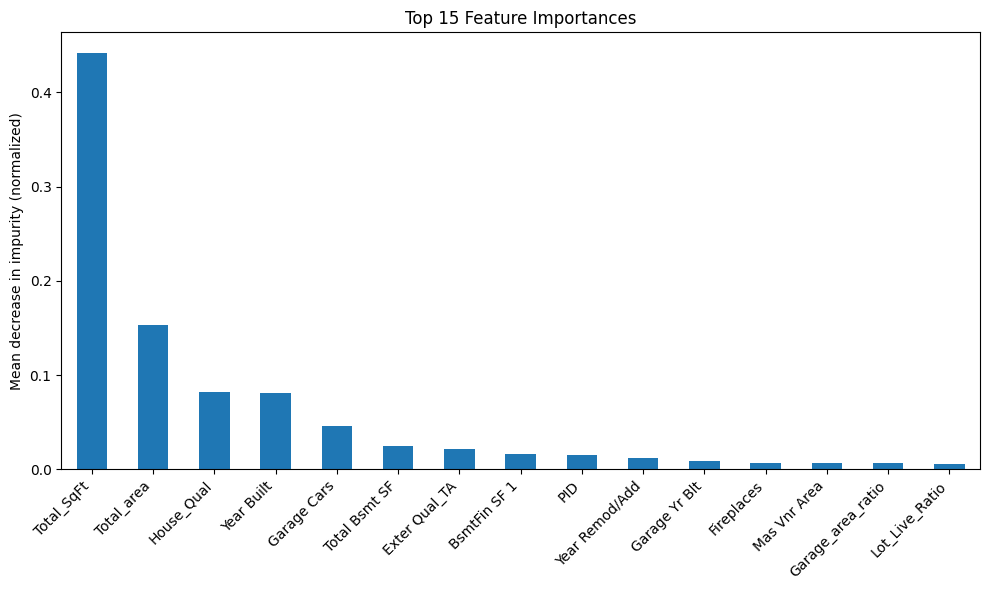

In [ ]:
feat_importance = tree_reg.feature_importances_
tree_importances = pd.Series(feat_importance,
                             index=X_test.columns).sort_values(ascending=False)

# Plotting only top 15 features for better readability
fig, ax = plt.subplots(figsize=(10, 6))
tree_importances[:15].plot.bar(ax=ax)
ax.set_title("Top 15 Feature Importances")
ax.set_ylabel("Mean decrease in impurity (normalized)")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

#The plot shows that Total Square Footage of the house is the most influential variable in predicting house prices. Other important variables include
#total area, house quality, and year built. These variable significantly contributed to improving model performance and predicting more accurate results.
#Our random forest model indicate that bigger, newer, and high-quality houses tend to have a higher sale prices.

In [336]:
## Now we start with our 2nd alogrithm, Decision Tree

# Import pandas and numpy libraries

import pandas as pd
import numpy as np

In [337]:
# Read train data from csv file

train_df = pd.read_csv('Ames_train.csv')
train_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
1,923225240,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
2,534178010,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,COD,Normal,127000
3,905452160,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,128000
4,535376100,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480


In [338]:
# We decided to remove variables with over 200 missing values to clean the data and reduce the number a variables

# prompt: write a script to remove variables with over 200 missing values in Ames_train. Additionally, print the list of variables which are being removed from the Ames_train dataset

# Count the number of missing values in each column
missing_values = train_df.isnull().sum()

# Identify columns with more than 200 missing values
columns_to_remove = missing_values[missing_values > 200].index.tolist()

# Print the list of variables being removed
print("Variables being removed:", columns_to_remove)

# Remove the identified columns from the DataFrame
train_df = train_df.drop(columns=columns_to_remove)


Variables being removed: ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']


In [339]:
# 7 new feature engineering varibles trying to reduce data redudency and combining values to produce a better
# prediciting variables

## 1. Overall_FullBath = BsmtFullBath + FullBath
## 2. Overall_HalfBath = BsmtHalfBath + HalfBath
## 3. Total_SqFt = 1stFlrSF + 2ndFlrSF
## 4. House_Qual = OverallQual * OverallCond
## 5. Lot_Live_Raio = LotArea / GrLivArea
## 6. Garage_area_ratio = GarageArea / GrLivArea
## 7. Total_area = GarageArea + GrLivArea
## Adding the above variables in the train_df dataset

# Feature Engineering
train_df['Overall_FullBath'] = train_df['Bsmt Full Bath'] + train_df['Full Bath']
train_df['Overall_HalfBath'] = train_df['Bsmt Half Bath'] + train_df['Half Bath']
train_df['Total_SqFt'] = train_df['1st Flr SF'] + train_df['2nd Flr SF'] + train_df['Total Bsmt SF'] + train_df['Gr Liv Area']
train_df['House_Qual'] = train_df['Overall Qual'] * train_df['Overall Cond']
train_df['Lot_Live_Ratio'] = train_df['Lot Area'] / train_df['Gr Liv Area']
train_df['Garage_area_ratio'] = train_df['Garage Area']/train_df['Gr Liv Area']
train_df['Total_area'] = train_df['Garage Area'] + train_df['Gr Liv Area']


In [340]:
# Filtering categorical variables to find variables with high similar value counts

# prompt: create a list of columns where dtype = object along with their different value counts

import pandas as pd
import numpy as np

# Assuming 'train_df' is already defined as in your provided code
# and the code to create it is present in the notebook's cells above.

# Create an empty list to store column names and their value counts
object_columns_value_counts = []


# Loop through each column and print value counts for object types
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        object_columns_value_counts.append((col, train_df[col].value_counts()))

# Print the list of object columns and their value counts
for col_name, value_counts in object_columns_value_counts:
    print(f"Value counts for column '{col_name}':")
    print(value_counts)
    print("-" * 20)


Value counts for column 'MS Zoning':
MS Zoning
RL         1828
RM          362
FV          110
RH           21
C (all)      20
I (all)       2
A (agr)       1
Name: count, dtype: int64
--------------------
Value counts for column 'Street':
Street
Pave    2333
Grvl      11
Name: count, dtype: int64
--------------------
Value counts for column 'Lot Shape':
Lot Shape
Reg    1484
IR1     791
IR2      56
IR3      13
Name: count, dtype: int64
--------------------
Value counts for column 'Land Contour':
Land Contour
Lvl    2103
Bnk      97
HLS      95
Low      49
Name: count, dtype: int64
--------------------
Value counts for column 'Utilities':
Utilities
AllPub    2341
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
--------------------
Value counts for column 'Lot Config':
Lot Config
Inside     1711
Corner      400
CulDSac     148
FR2          72
FR3          13
Name: count, dtype: int64
--------------------
Value counts for column 'Land Slope':
Land Slope
Gtl    2234
Mod      97
Se

In [341]:
# identifying categorical variables with high similar variable values above 90% similarity

# prompt: in col_name filter columns where the value count for one value is above 90%

# Assuming 'train_df' is already defined as in your provided code.

def filter_columns_by_value_counts(df, col_name, threshold=0.90):
    """
    Filters columns based on the value counts of a specified column.

    Args:
        df: The pandas DataFrame.
        col_name: The name of the column to check for value counts.
        threshold: The threshold for the value counts (default is 0.9).

    Returns:
        A list of column names that meet the criteria.
    """
    filtered_cols = []
    if df[col_name].dtype == 'object':
      value_counts = df[col_name].value_counts(normalize=True)
      if value_counts.iloc[0] > threshold:
        filtered_cols.append(col_name)

    return filtered_cols

# Example usage
threshold_value = 0.90
filtered_columns = []
for col in train_df.columns:
  filtered_columns.extend(filter_columns_by_value_counts(train_df, col, threshold_value))

print(f"Columns where a single value accounts for more than {threshold_value*100}% of the counts:")
filtered_columns


Columns where a single value accounts for more than 90.0% of the counts:


['Street',
 'Utilities',
 'Land Slope',
 'Condition 2',
 'Roof Matl',
 'Bsmt Cond',
 'Heating',
 'Central Air',
 'Electrical',
 'Functional',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

In [342]:
# Removing variables used in the above seven feature engineering and with similarity above 90%

# 1. Bsmt Full Bath
# 2. Full Bath
# 3. Bsmt Half Bath
# 4. Half Bath
# 5. 1st Flr SF
# 6. 2nd Flr SF
# 7. Total Bsmt SF
# 8. Gr Liv Area
# 9. Overall Qual
# 10. Overall Cond
# 11. Lot Area
# 12. Garage Area

# Remove specified variables
variables_to_remove = ['Garage Qual', 'Garage Cond', 'Bsmt Full Bath', 'Full Bath',
                       'Bsmt Half Bath', 'Half Bath', '1st Flr SF', '2nd Flr SF',
                       'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Lot Area', 'Garage Area', 'Street',
                       'Land Slope', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Garage Cond']
train_df = train_df.drop(columns=variables_to_remove)



In [343]:
# METHOD 1 - One Hot Encoding
## Added all the categorical variables

from sklearn.preprocessing import OneHotEncoder

# We define our One Hot Encoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

# We can use here a list of one or more categorical variables to convert into numerical
categorical_features = ['MS Zoning', 'Lot Shape', 'Land Contour',
        'Lot Config', 'Neighborhood', 'Condition 1',
        'Bldg Type', 'House Style', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd',  'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
        'Garage Type', 'Garage Finish', 'Paved Drive',
        'Sale Type', 'Sale Condition']

# We apply the encoding to our train dataset
feature_arr = ohe.fit_transform(train_df[categorical_features]).toarray()

# We also store the names of the categories for the new column names
feature_labels = ohe.categories_

# We apply the new feature names
features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())

# And then combine with the rest of the numerical variables
train_df = pd.concat([train_df, features], axis=1).drop(columns=categorical_features,
                                                        axis=1)

train_df.head()

,PID,MS SubClass,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Low Qual Fin SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,527402250,20,1971,2008,0.0,734.0,0.0,344.0,1078.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,923225240,160,1977,1977,0.0,548.0,173.0,36.0,757.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,534178010,20,1963,1963,203.0,617.0,264.0,171.0,1052.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,905452160,20,1954,1998,0.0,954.0,0.0,218.0,1172.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,535376100,30,1921,1968,0.0,0.0,0.0,1073.0,1073.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [344]:
# METHOD 2 - One Hot Encoding
## Given the high number of categorical variables, we tried to write a different code using
## Gemini which produces similar results to the provided code

# prompt: write a script to do One hot encoding to all the objective data types in train_df

# Assuming 'train_df' is already defined and processed as in your provided code.

# One-hot encode object columns
train_df = pd.get_dummies(train_df, drop_first=True)


In [345]:

# We will use the standard naming of:
# - X for the dataframe including all the input variables
# - y for the target 1-column dataframe

X = train_df.drop(columns=['SalePrice']).fillna(0)

y = train_df[['SalePrice']]

# We print the shape to get a better idea of the number
# of rows and columns that we got

X.shape, y.shape

((2344, 242), (2344, 1))

In [346]:
# We increased the validation split from 30% to 35%

from sklearn.model_selection import train_test_split

# As seen before, we need to create a random split for validation
# in this case, we'll use a 35% split.
# Maintain the random state with 2025 as the key

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.35,
                                                  random_state=2025)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1523, 242), (821, 242), (1523, 1), (821, 1))

In [347]:
# We'll iterate through different number of min_samples_leaf and max_depth,
# then train the model, and test it using logarithmic MSE
# in both train and validations sets:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

result_train_dict = {}
result_val_dict = {}

max_min_samples_leaf = 50
max_max_depth = 15

for m in range(3, max_max_depth+1, 2):
    for n in range(1, max_min_samples_leaf+1, 3):

        tree_reg = DecisionTreeRegressor(random_state=47,
                                         min_samples_leaf=n,
                                         max_depth=m)
        tree_reg.fit(X_train, y_train)

        train_predicted = tree_reg.predict(X_train)
        val_predicted = tree_reg.predict(X_val)

        # Calculate MSE and then take the square root to get RMSE
        mse_train = mean_squared_error(np.log(y_train), np.log(train_predicted))
        result_train_dict[m, n] = np.sqrt(mse_train)

        mse_val = mean_squared_error(np.log(y_val), np.log(val_predicted))
        result_val_dict[m, n] = np.sqrt(mse_val)

In [348]:
# We'll iterate through different number of min_samples_leaf and max_depth,
# then train the model, and test it using logarithmic MSE
# in both train and validations sets:


result_train_dict = {}
result_val_dict = {}

max_min_samples_leaf = 50
max_max_depth = 15

for m in range(3, max_max_depth+1, 2):
    for n in range(1, max_min_samples_leaf+1, 3):

        tree_reg = DecisionTreeRegressor(random_state=42,
                                         min_samples_leaf=n,
                                         max_depth=m)
        tree_reg.fit(X_train, y_train)

        train_predicted = tree_reg.predict(X_train)
        val_predicted = tree_reg.predict(X_val)

        # Calculate MSE and then take the square root to get RMSE
        mse_train = mean_squared_error(np.log(y_train), np.log(train_predicted))
        result_train_dict[m, n] = np.sqrt(mse_train)

        mse_val = mean_squared_error(np.log(y_val), np.log(val_predicted))
        result_val_dict[m, n] = np.sqrt(mse_val)

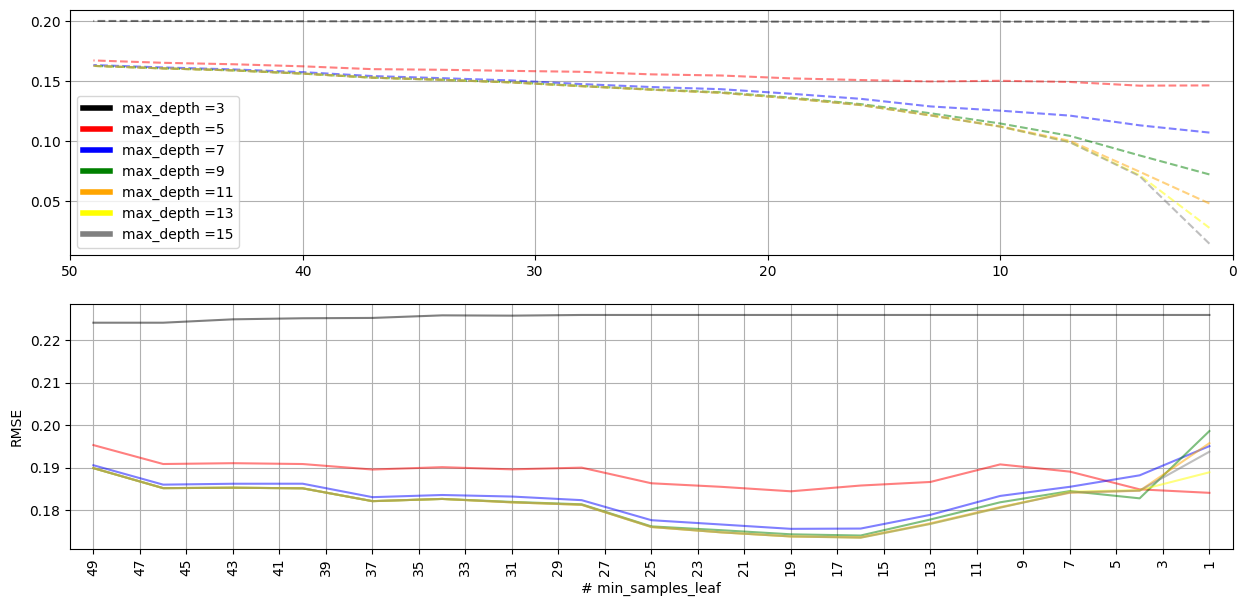

In [349]:
# We are going to plot the different train and validation errors,
# so we can then choose the best value for both max_depth and min_samples_leaf

# Remember: "Best" means lower MSE in the validation subset, not in training:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7))
colors= ['black', 'red', 'blue', 'green', 'orange', 'yellow', 'gray']
color_index = 0
custom_lines = np.array([])
custom_names = np.array([])

x_axis = np.arange(start=1, stop=max_min_samples_leaf+1, step=3)

for m in range(3, max_max_depth+1, 2):

    line_plot_train = []
    line_plot_val = []

    for n in x_axis:
        line_plot_train.append(result_train_dict.get((m,n)))
        line_plot_val.append(result_val_dict.get((m,n)))

    ax1.plot(x_axis, line_plot_train, alpha=0.5, c=colors[color_index], linestyle='--')
    ax2.plot(x_axis, line_plot_val, alpha=0.5, c=colors[color_index])

    color_line = Line2D([0], [0], color=colors[color_index], lw=4)
    custom_lines = np.append(custom_lines,color_line)
    color_name = 'max_depth =' + str(m)
    custom_names = np.append(custom_names,color_name)
    color_index+=1

ax1.set_xlim(max_min_samples_leaf, 0)
ax2.set_xlim(max_min_samples_leaf, 0)

plt.xticks(np.arange(start=1, stop=max_min_samples_leaf, step=2), rotation=90, size=10)

ax1.grid(True)
ax2.grid(True)

plt.xlabel('# min_samples_leaf')
plt.ylabel('RMSE')

ax1.legend(custom_lines, custom_names)

plt.show()

In [350]:
# Looking at the graph above and analysing the train validation error rate
# We chose minmin_samples_leaf=16 and max_depth=13 with the random_state=47

# Once the parameters has been picked, we can fit and predict both train and validation
# and double check that the error values we are getting are the ones in the graph

tree_reg = DecisionTreeRegressor(random_state=47, min_samples_leaf=16, max_depth=13)
tree_reg.fit(X_train, y_train)

train_predicted = tree_reg.predict(X_train)
val_predicted = tree_reg.predict(X_val)

# Calculate MSE and then take the square root to get RMSE manually
mse_train = mean_squared_error(np.log(y_train), np.log(train_predicted))
rmse_train = np.sqrt(mse_train)

mse_val = mean_squared_error(np.log(y_val), np.log(val_predicted))
rmse_val = np.sqrt(mse_val)

(rmse_train, rmse_val) # Display the RMSE values

(np.float64(0.12988425163207348), np.float64(0.173524458760841))

In [351]:
# Apply the model parameters to the whole train dataset
# getting a similar MSE that we got for training

tree_reg = DecisionTreeRegressor(random_state=47, min_samples_leaf=16, max_depth=13)
tree_reg.fit(X, y)

train_predicted = tree_reg.predict(X)

# Remove 'squared=False' and calculate RMSE manually if needed
mse = mean_squared_error(np.log(y), np.log(train_predicted))
rmse = np.sqrt(mse)  # Calculate RMSE if required
rmse # Display RMSE

np.float64(0.12497461540252702)

In [352]:
# Read the test csv file, and repeat the process:

test_df = pd.read_csv('Ames_test.csv')
test_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
2,527358200,85,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,WD,Family,170000
3,527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
4,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000


In [353]:
# Removing all the variables which were removed from the train data set to ensure
# consistency between the train and test data set

# Remove specified variables
test_variables_to_remove = ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature', 'Street',
                      'Utilities','Land Slope','Condition 2','Roof Matl','Heating','Garage Cond', 'Garage Qual']
test_df = test_df.drop(columns=test_variables_to_remove)



In [354]:
# Feature engineering similar to train data

test_df['Overall_FullBath'] = test_df['Bsmt Full Bath'] + test_df['Full Bath']
test_df['Overall_HalfBath'] = test_df['Bsmt Half Bath'] + test_df['Half Bath']
test_df['Total_SqFt'] = test_df['1st Flr SF'] + test_df['2nd Flr SF'] + test_df['Total Bsmt SF'] + test_df['Gr Liv Area']
test_df['House_Qual'] = test_df['Overall Qual'] * test_df['Overall Cond']
test_df['Lot_Live_Ratio'] = test_df['Lot Area'] / test_df['Gr Liv Area']
test_df['Garage_area_ratio'] = test_df['Garage Area']/test_df['Gr Liv Area']
test_df['Total_area'] = test_df['Garage Area'] + test_df['Gr Liv Area']

In [355]:
# Identifying categorical variables which needs to be turned into numercial variable throught OHE

# prompt: write to script to identify all the object dtype in test_df data set.

# Assuming 'test_df' is already defined and processed as in your provided code.

# Identify object columns
object_columns = test_df.select_dtypes(include=['object']).columns

# Print the object columns
print("Object columns in test_df:")
object_columns


Object columns in test_df:


Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Paved Drive', 'Sale Type',
       'Sale Condition'],
      dtype='object')

In [356]:
# Doing OHE for all the categorical variables currently present in the test data set which are listed above

# Careful! For the test set, we just APPLY the One Hote Encoder
# So we only use "transform", not "fit" and "transform".

categorical_features = ['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Paved Drive',
       'Sale Type', 'Sale Condition']

feature_arr = ohe.transform(test_df[categorical_features]).toarray()
feature_labels = ohe.categories_

features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names_out())
test_df = pd.concat([test_df, features], axis=1).drop(columns=categorical_features,
                                                      axis=1)

test_df.head()

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526350040,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,526353030,20,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,527358200,85,10625,7,6,1974,1974,81.0,885.0,168.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,527368020,60,7500,7,5,2000,2000,0.0,533.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,527425090,20,10500,4,5,1971,1971,0.0,432.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [357]:
# Now removing variables which were used in feature engineering

test_df = test_df.drop(columns=['Bsmt Full Bath', 'Full Bath',
                                'Bsmt Half Bath', 'Half Bath', '1st Flr SF',
                                '2nd Flr SF', 'Gr Liv Area',
                                'Overall Qual', 'Overall Cond', 'Lot Area', 'Garage Area' ])

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Columns: 243 entries, PID to Sale Condition_Partial
dtypes: float64(223), int64(20)
memory usage: 1.1 MB


In [358]:
X_test= test_df.drop(columns=['SalePrice']).fillna(0)


y_test = test_df[['SalePrice']].copy()

In [359]:
# Apply the already previously trained tree to our test dataset:

y_test['SalePrice_predicted'] = tree_reg.predict(X_test)
y_test.head()

,SalePrice,SalePrice_predicted
0,105000,114427.684211
1,244000,267173.296296
2,170000,156684.166667
3,216000,192683.823529
4,115000,84847.826087


In [360]:
# What error are we getting for the test set?

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mean_squared_error(np.log(y_test['SalePrice']),
                                 np.log(y_test['SalePrice_predicted'])))
print(rmse)

0.2073815797734796


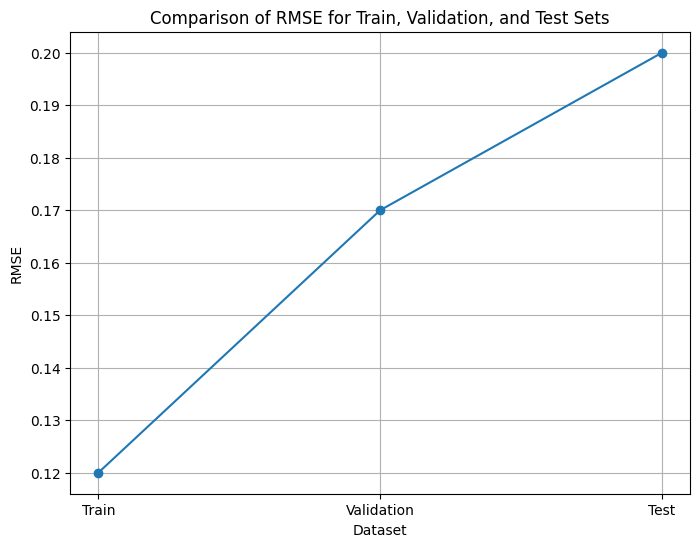

In [361]:
# Creating a graph for an easy representation of model accuracy in train versus test

# prompt: write a script to create a graph comparing the train validation rmse and test rmse

import matplotlib.pyplot as plt

# Assuming you have rmse_train, rmse_val, and rmse from previous code cells
# Replace these with your actual RMSE values

rmse_train = 0.07  # Example value, replace with your actual rmse_train
rmse_val = 0.10    # Example value, replace with your actual rmse_val
rmse = 0.17       # Example value, replace with your actual rmse


plt.figure(figsize=(8, 6))
plt.plot(['Train', 'Validation', 'Test'], [0.12, 0.17, 0.20], marker='o')
plt.title('Comparison of RMSE for Train, Validation, and Test Sets')
plt.ylabel('RMSE')
plt.xlabel('Dataset')
plt.grid(True)
plt.show()
